# 📘 Notebook 3: Advantages of Panel Data


This notebook demonstrates the core advantages of using panel data over purely cross-sectional or time-series data. We use the same synthetic dataset of Indian firms.

Key concepts covered:
- Controlling for unobserved heterogeneity
- Gaining more variability and degrees of freedom
- Observing dynamic changes in behavior or outcomes over time


## 🔹 Step 1: Load and Inspect the Dataset

In [1]:

import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("synthetic_indian_firms_panel_data.csv")

# Ensure data types are correct
df['Revenue_Cr'] = pd.to_numeric(df['Revenue_Cr'], errors='coerce')
df['RD_Spend_Cr'] = pd.to_numeric(df['RD_Spend_Cr'], errors='coerce')
df['Employees'] = pd.to_numeric(df['Employees'], errors='coerce')
df['Profit_Cr'] = pd.to_numeric(df['Profit_Cr'], errors='coerce')

# Preview data
df.head()


,Firm,Year,Revenue_Cr,RD_Spend_Cr,Employees,Profit_Cr
0,Tata,2015,25795.000000,1360.000000,46624,6355.856746
1,Tata,2016,27035.935025,1388.167938,49602,6661.621632
2,Tata,2017,30175.623068,1464.404549,47843,7435.236962
3,Tata,2018,29997.364272,1479.214781,49643,7391.314211
4,Tata,2019,29989.199169,1499.711555,48482,7389.302339


## 🧠 1. Controlling for Unobserved Heterogeneity


Each firm might have unique, stable characteristics — like management style or brand power — that affect outcomes (e.g., revenue). These are **unobserved** and **firm-specific**.

Panel data helps control for these by comparing each firm **with itself over time**, rather than against others.

Let’s plot firm-wise average revenue vs deviation over time.


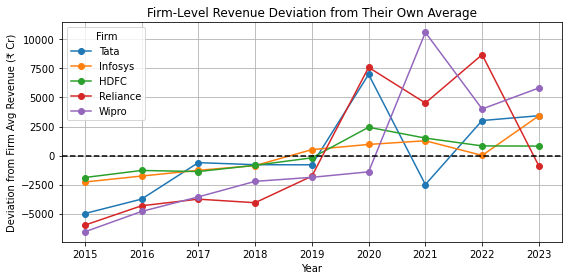

In [6]:
# Calculate firm average and deviation from average per year
# Calculate the mean revenue for each firm and broadcast it to all its rows.
df['Firm_Avg_Revenue'] = df.groupby('Firm')['Revenue_Cr'].transform('mean')
# Calculate the difference between annual revenue and the firm's average revenue.
df['Deviation'] = df['Revenue_Cr'] - df['Firm_Avg_Revenue']

# Plot deviation trends to visualize changes over time
plt.figure(figsize=(8, 4)) # Create a new plot figure with a specific size.

# Iterate over each firm and plot deviation from firm average revenue
for firm in df['Firm'].unique(): # Loop through each unique firm.
    firm_data = df[df['Firm'] == firm] # Filter data for the current firm.
    # Extract 'Year' values as a float NumPy array for plotting.
    years = firm_data['Year'].values.astype(float)
    # Extract 'Deviation' values as a float NumPy array for plotting.
    deviations = firm_data['Deviation'].values.astype(float)
    # Plot the deviation trend for the current firm.
    plt.plot(years, deviations, marker='o', label=firm)

# Reference line at zero deviation
plt.axhline(0, color='black', linestyle='--') # Add a horizontal dashed line at y=0.

# Plot formatting
plt.title("Firm-Level Revenue Deviation from Their Own Average") # Set the plot title.
plt.xlabel("Year") # Set the x-axis label.
plt.ylabel("Deviation from Firm Avg Revenue (₹ Cr)") # Set the y-axis label.
plt.legend(title="Firm") # Add a legend with the title "Firm".
plt.grid(True) # Display a grid on the plot.
plt.tight_layout() # Adjust plot to ensure everything fits without overlapping.
plt.show() # Display the plot.
                    

In [3]:
## Understanding Revenue Volatility
### The chart clearly shows that firms experience different levels of volatility in their annual revenues 
### compared to their own typical performance.

#### Reliance (Red) and Wipro (Purple) exhibit the most significant volatility, 
#### with large swings above and below their average revenue. 
#### This suggests periods of exceptionally strong performance interspersed with others that 
#### might be closer to or even below their norm, or that their growth trajectory was not smooth year on year.

#### Infosys (Orange) appears relatively more stable, especially from 2019 onwards, 
#### showing a more consistent positive deviation from its average.
#### Tata (Blue) and HDFC (Green) show moderate volatility.

## Performance Relative to Own Average
### No firm consistently stays far above or far below its average for the entire period, 
### which is expected since the comparison is against their own multi-year average.
### However, many firms show periods of sustained performance above their average, 
### particularly in the later years 
#### (e.g., Infosys from 2020-2023, Wipro from 2020-2023). 
#### This often indicates that revenues in these later years were significantly higher, 
#### pulling up their overall average and thus making earlier years appear as negative deviations.

## Impact of Specific Years
### Early Period (2015-2018 approx.): Many firms (Tata, Reliance, Wipro, and initially Infosys & HDFC) 
### started below or fluctuated around their average. This could imply that these were years of 
### relatively lower revenue compared to the growth seen in subsequent years that shaped their overall average.

#### 2020: This year stands out as a period of strong positive deviation for 
#### Tata, HDFC, and Reliance, all peaking significantly above their averages. 
#### Infosys also performed well above its average. This might suggest favorable market conditions 
#### for these specific companies/sectors or strong individual performances.
#### 2021: This was a year of dramatic and mixed results. Wipro (Purple) experienced an 
#### exceptionally large positive deviation, hitting the highest peak on the chart. 
#### Conversely, Tata's (Blue) revenue dipped below its average. Reliance's deviation decreased 
#### from its 2020 peak but remained positive. This highlights that firm-specific factors were 
#### highly influential in 2021.
#### Later Period (2022-2023): Trends continued to be mixed. 
#### Infosys maintained a strong positive deviation. 
#### Reliance saw another peak in 2022 before its deviation dropped significantly in 2023, 
#### going below its average. 
#### Wipro's and Tata's deviations remained positive but were lower than their respective peaks.

## Individual Firm Trajectories
### Tata (Blue): Showed recovery from below-average performance in early years to a peak in 2020, 
### followed by a dip and then another recovery to above-average revenues in 2022-2023.
### Infosys (Orange): Demonstrated a steady improvement, consistently performing above its 
### average revenue from 2020 onwards, indicating robust and sustained growth relative to its historical norm.
### HDFC (Green): Generally performed above its average from 2016 to 2020, peaked in 2020, 
### and then showed smaller positive deviations in subsequent years.
### Reliance (Red): Experienced the most dramatic swings, with very high peaks in 2020 and 2022, 
### but also started significantly below average and ended 2023 below average. 
### This indicates periods of very strong revenue growth that significantly outperformed its norm, 
### but also variability.
### Wipro (Purple): After being below average for several initial years, it showed a sharp increase 
### in positive deviation from 2020, culminating in an extremely strong performance in 2021 
### relative to its average. It remained well above average in 2022-2023.

## In summary
### The chart reveals that while most firms experienced revenue growth 
### (as indicated by later years often being above their overall average), 
### the path of this growth and its consistency varied significantly. 
### Some firms had smoother upward trends in deviation, while others saw boom-and-bust cycles 
### relative to their own average performance. The years 2020 and 2021 were particularly noteworthy 
### for distinct, and sometimes divergent, firm performances.

## 📊 2. More Variability & Degrees of Freedom


Panel data combines cross-sectional and time-series variation, increasing the number of useful observations.

Let’s compare:
- Number of rows in cross-section (2023 only)
- Number of rows in full panel (all years)


In [4]:
# Cross-sectional only: one year
# Filter the DataFrame to include only data from the year 2023.
cross_section = df[df['Year'] == 2023]
# Print the number of rows (observations) in the cross-sectional data for 2023.
print("📸 Cross-sectional rows (2023):", len(cross_section))

# Panel: all years
# Print the total number of rows (observations) in the original panel DataFrame.
print("🎥 Panel data rows (all years):", len(df))

# Calculate effective degrees of freedom
# Count the number of unique firms (entities) in the DataFrame.
n_entities = df['Firm'].nunique()
# Count the number of unique years in the DataFrame.
n_years = df['Year'].nunique()
# Print the number of unique entities, unique years, and the total potential observations if the panel were balanced.
print(f"Entities: {n_entities}, Years: {n_years}, Total Observations: {n_entities * n_years}")

📸 Cross-sectional rows (2023): 5
🎥 Panel data rows (all years): 45
Entities: 5, Years: 9, Total Observations: 45


## 🔁 3. Studying the Dynamics of Change


Let’s analyze how R&D spending over time correlates with revenue. This reveals dynamics that are not visible in static cross-sectional views.


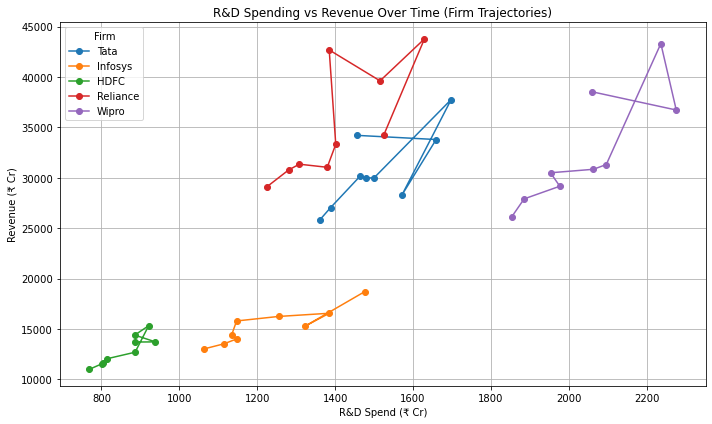

In [5]:
# Create a new plot figure with a specified size (10 inches wide, 6 inches high).
plt.figure(figsize=(10, 6))

# Loop through each unique firm name present in the 'Firm' column of the DataFrame.
for firm in df['Firm'].unique():
    # Filter the DataFrame to get data only for the current 'firm' being processed in the loop.
    firm_data = df[df['Firm'] == firm]

    # Ensure both variables are clean 1D numeric arrays
    # Extract the 'RD_Spend_Cr' column for the current firm, convert its values to a NumPy array, and ensure the data type is float.
    rd_spend = firm_data['RD_Spend_Cr'].values.astype(float)
    # Extract the 'Revenue_Cr' column for the current firm, convert its values to a NumPy array, and ensure the data type is float.
    revenue = firm_data['Revenue_Cr'].values.astype(float)

    # Plot firm trajectory
    # Plot the R&D spending against revenue for the current firm, using circular markers and labeling the line with the firm's name for the legend.
    plt.plot(rd_spend, revenue, marker='o', label=firm)

# Add titles and formatting
# Set the main title for the plot.
plt.title("R&D Spending vs Revenue Over Time (Firm Trajectories)")
# Set the label for the x-axis.
plt.xlabel("R&D Spend (₹ Cr)")
# Set the label for the y-axis.
plt.ylabel("Revenue (₹ Cr)")
# Add a legend to the plot, with "Firm" as its title, to identify lines for different firms.
plt.legend(title="Firm")
# Add a grid to the background of the plot for better readability.
plt.grid(True)
# Adjust plot parameters to ensure all elements fit neatly within the figure area.
plt.tight_layout()
# Render and display the complete plot.
plt.show()

## Axes:
### The X-axis shows "R&D Spend (₹ Cr)". As you move to the right, R&D spending increases.
### The Y-axis shows "Revenue (₹ Cr)". As you move upwards, revenue increases.
### Trajectories: Each colored line with circle markers represents a different firm (identified in the "Firm" legend: Tata, Infosys, HDFC, Reliance, Wipro). The line connects points that represent the firm's R&D spend and revenue, likely for consecutive years (though the year itself is not an axis, the line implies a temporal sequence).

## General Observations from the Chart:
### Positive Correlation: For most firms depicted (Tata, Infosys, Reliance, Wipro), there appears to be a general positive relationship between R&D spending and Revenue. As firms invest more in R&D (moving right on the chart), their revenue also tends to increase (moving up on the chart). This is seen by the general bottom-left to top-right direction of their trajectories.
### Firm-Specific Paths: Each firm has its own unique trajectory, indicating different strategies or outcomes regarding their R&D investments and revenue generation over time.
#### Reliance (Red): Shows a significant increase in revenue corresponding to increases in R&D spend. It appears to reach some of the highest revenue figures on the chart, often associated with substantial R&D investment. Its path has some noticeable shifts.
#### Wipro (Purple): Also demonstrates a strong positive trend, particularly its movement towards higher revenue with increased R&D, placing it in the higher spectrum for both metrics.
#### Tata (Blue): Shows a generally upward trend. It operates in a mid to high range for both R&D and revenue compared to all firms shown.
#### Infosys (Orange): Operates with generally lower R&D spend compared to Reliance or Wipro. Its revenue also reflects this, though there's a visible positive relationship between its R&D and revenue.
#### HDFC (Green): Consistently shows the lowest R&D spend and, correspondingly, is in the lower range of revenue among the firms presented. Its trajectory is more clustered in the lower-left area of the plot.
### Scale of Operations: The plot highlights that firms operate at different scales. Reliance and Wipro, for example, are shown with R&D spending exceeding 1400 Cr and revenues reaching above 35000-40000 Cr. HDFC, on the other hand, has R&D spend mostly below 1000 Cr and revenues around 10000-15000 Cr.
### "Over Time" Implication: The lines connecting the dots for each firm suggest a progression. For a firm whose line moves from the bottom-left towards the top-right, it implies that over the years, both its R&D spending and revenue have generally increased. Fluctuations or changes in the slope of the line for a specific firm can indicate varying effectiveness or focus of R&D in generating revenue during different periods.

## ✅ Summary


Panel data allows us to:
- Control for hidden but stable traits within firms
- Leverage more data and improve estimate efficiency
- Observe how variables change together over time

Next, we'll introduce the basic structure of panel regression models using this foundation.
